In [38]:
# lista_05
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy as scp
import scipy.integrate as integrate
from scipy.interpolate import interp1d

### Exercicio 01



In [39]:



def phi( x, lista_X):
 p_0 = ((x-lista_X[1])*(x-lista_X[2]))/((lista_X[0]-lista_X[1])*(lista_X[0]-lista_X[2]))
 p_1 = ((x-lista_X[0])*(x-lista_X[2]))/((lista_X[1]-lista_X[0])*(lista_X[1]-lista_X[2]))
 p_2 = ((x-lista_X[0])*(x-lista_X[1]))/((lista_X[2]-lista_X[0])*(lista_X[2]-lista_X[1]))
 return p_0, p_1, p_2

def interpolacao( x,y):
 x_0= phi(x[0],x)
 x_1= phi(x[1],x)
 x_2= phi(x[2],x)

 A= np.matrix([[x_0[0],x_0[1],x_0[2]],[x_1[0],x_1[1],x_1[2]],[x_2[0],x_2[1],x_2[2]]])
 linearizada = np.linalg.solve(A,y)
 return linearizada

def solucao( x, list_p, linearizada, tamanho):
    soma=0
    for i in range(tamanho):
        soma+= list_p[i]*linearizada[i]
    return soma

In [40]:
P_x = [2,6,4]
P_y = [14,24,25]

q = interpolacao(P_x,P_y)
print(q)

x=2
size = len(P_x)

list_p =phi(x,P_x)
soma = solucao(x,list_p,q,size)

print(soma)


[14. 24. 25.]
14.0


### Exercicio 2


In [41]:
def R(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Calculate points and interpolate
def calculate_points(info, P_x, P_y, tipo):
    xeval = np.linspace(-info, info, 40000)
    yeval = R(xeval)
    y_resp = interp1d(P_x, P_y, kind=tipo)
    return xeval, yeval, y_resp

# Plot the graph
def grafico(pointsX, pointsY, xeval, yeval, y_resp):
    plt.plot(pointsX, pointsY, 'ob', label='Data Points')
    plt.plot(xeval, yeval, '-r', label='Runge Function')
    plt.plot(xeval, y_resp(xeval), '-g', label='Interpolation')
    plt.legend()
    plt.show()

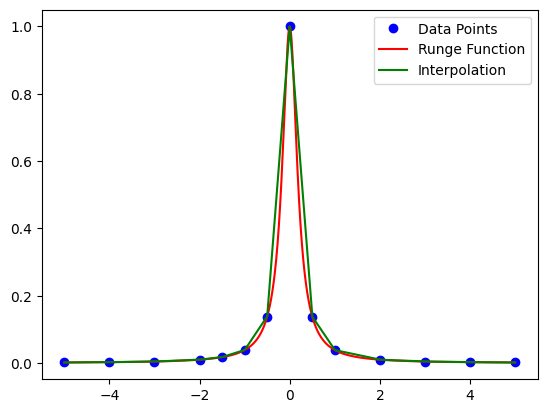

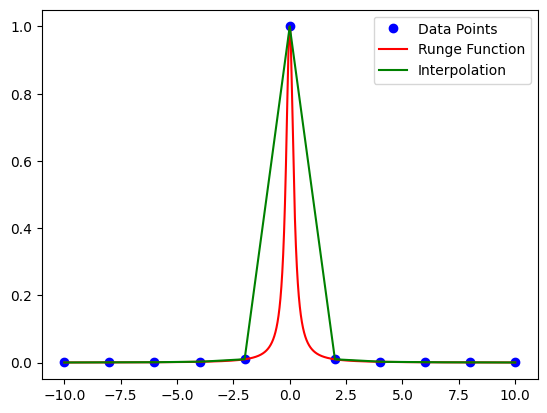

In [42]:
# Example entries
x1 = np.array([-5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 2, 3, 4, 5])
y1 = R(x1)

x2 = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
y2 = R(x2)

# Plotting
xeval, yeval, y_resp = calculate_points(5, x1, y1, 'linear')
grafico(x1, y1, xeval, yeval, y_resp)

xeval, yeval, y_resp = calculate_points(10, x2, y2, 'linear')
grafico(x2, y2, xeval, yeval, y_resp)

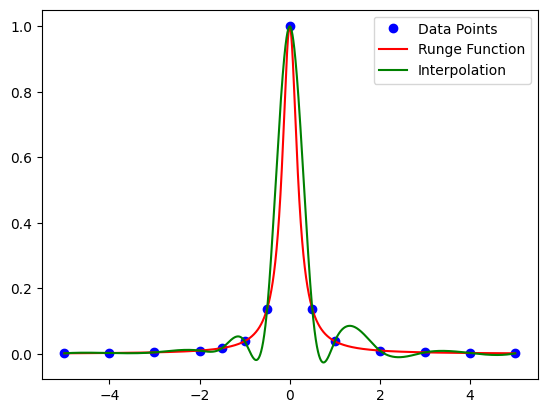

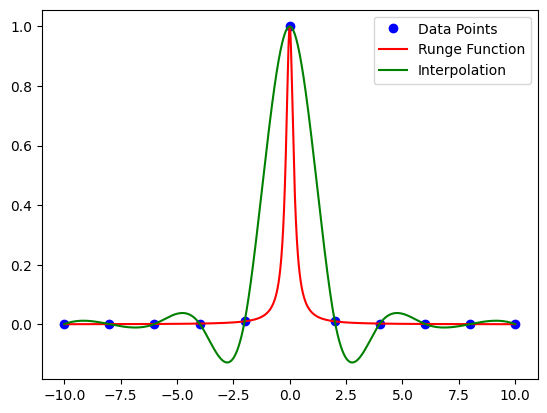

In [43]:
xeval, yeval, y_resp = calculate_points(5, x1, y1, 'cubic')
grafico(x1, y1, xeval, yeval, y_resp)

xeval, yeval, y_resp = calculate_points(10, x2, y2, 'cubic')
grafico(x2, y2, xeval, yeval, y_resp)

### Exercicio 3


### Exercicio 04


In [44]:
data = np.loadtxt('data.txt', dtype = 'f', delimiter = ' ')

c1 = data[:,0]
c2 = data[:,1]
c3 = data[:,2]
c4 = data[:,3]

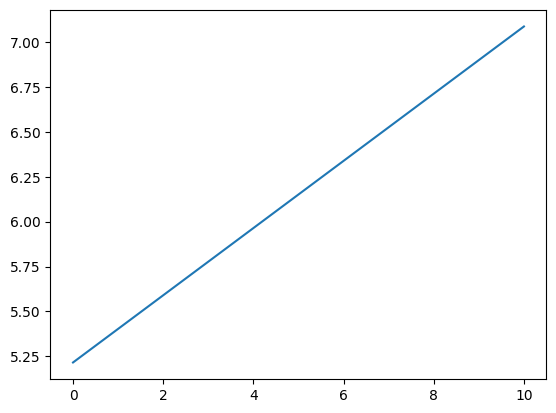

In [45]:
A = np.zeros(shape=(100,2))
At = np.zeros(shape=(100,2))
A[:, 0] = 1
A[:, 1] = c1

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c3

# Descobrindo a 'matriz' de coeficientes da equação polinomial de grau 1
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(0, 10, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

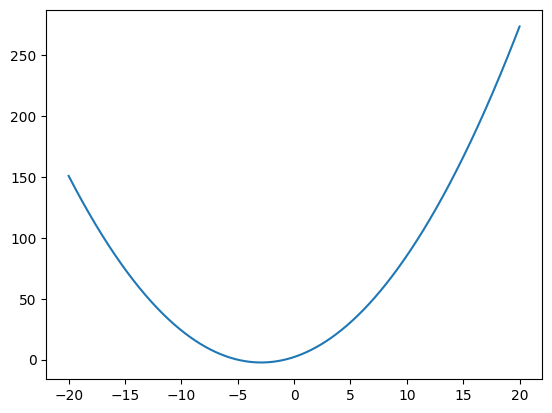

In [46]:
A = np.zeros(shape=(100,3))
At = np.zeros(shape=(100,3))
A[:, 0] = 1
A[:, 1] = c1

for i in range(len(data)-1):
    A[i][2] = (float(c1[i]))**2

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c3

# Descobrindo a 'matriz' de coeficientes dos polinômios
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(-20, 20, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

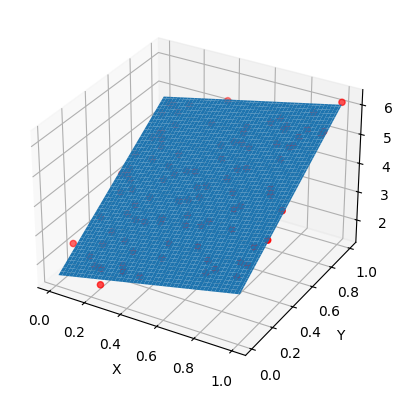

In [48]:
A = np.zeros(shape=(100,3))
At = np.zeros(shape=(100,3))
A[:, 0] = 1
A[:, 1] = c1
A[:, 2] = c2

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c4

c = np.linalg.solve(B,(A_t@y))

x = np.linspace(min(data[:,0]), max(data[:,0]), 100)
y = np.linspace(min(data[:,1]), max(data[:,1]), 100)

x = np.tile(x, (100, 1))
y = np.tile(y, (100, 1)).T


z = c[0] + x * c[1] + y * c[2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data[:,0], data[:,1], data[:,3], color = 'red')
ax.plot_surface(x,y,z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(x,y)')

plt.show()


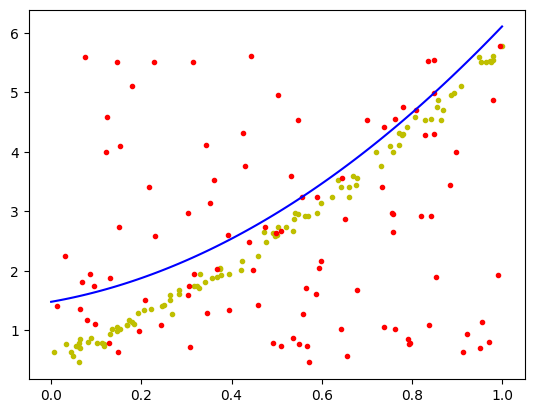

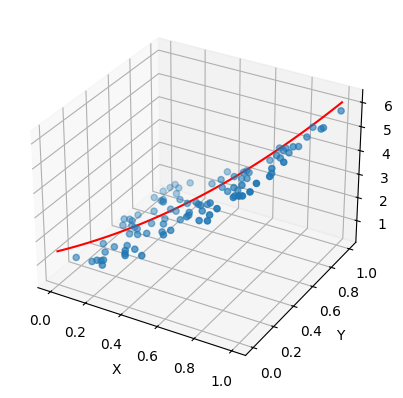

In [ ]:
x = y = np.linspace(0, 1, 100)

coef = [c[2], c[1],c[0]]
z = np.polyval(coef, x)

plt.plot(c1, c3, '.y')
plt.plot(c2, c3, '.r') 
plt.plot(x, z, '-b')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(c1, c2, c3)
ax.plot(x,y,z,'-r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

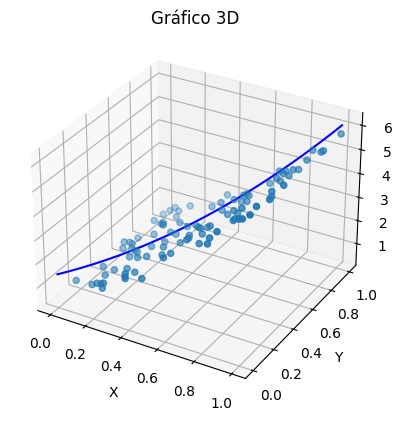

In [ ]:

# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(c1, c2, c3)
ax.plot(x, y, z, '-b')

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plt.title('Gráfico 3D')
plt.show()
#FUNCIONAAAAA
#FUNCIONOU HAAAAAAAAAAAAAAAAAAAAAAAAAAAA

### exericio 05

In [ ]:
def media(v1, v2):
    return (v1 + v2) / 2

def func(x):
    return 4 / (1 + x**2)

def integral(a, b, lista, func):
    medio = []
    trapezio = []
    simpson = []

    for i in lista:
        h = (b - a) / i
        x = a + np.arange(1, i + 1) * h
        x_prev = x - h
        y = media(x_prev, x)

        medio_ = h * np.sum(func(y))
        trapezio_ = h * (np.sum(func(x_prev) + func(x)) / 2)
        simpson_ = h * (np.sum(func(x_prev) + 4 * func(y) + func(x)) / 6)

        medio.append(medio_)
        trapezio.append(trapezio_)
        simpson.append(simpson_)

    return medio, trapezio, simpson

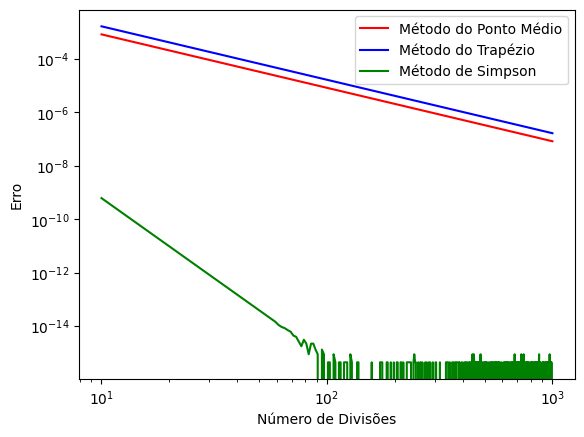

In [ ]:
i = np.linspace(10, 10**3, 500, dtype=int)
a = 0
b = 1

difmedio, diftrapezio, difsimpson = integral(a, b, i, func)

for j in range(len(i)):
    difmedio[j] = abs(np.pi - difmedio[j])
    diftrapezio[j] = abs(np.pi - diftrapezio[j])
    difsimpson[j] = abs(np.pi - difsimpson[j])

plt.loglog(i, difmedio, 'r', label='Método do Ponto Médio')
plt.loglog(i, diftrapezio, 'b', label='Método do Trapézio')
plt.loglog(i, difsimpson, 'g', label='Método de Simpson')

plt.xlabel('Número de Divisões')
plt.ylabel('Erro')
plt.legend()
plt.show()

### Exercicio 06

In [ ]:
import numpy as np
import math

def GeraRede(nx, ny, X):
    nv = nx * ny
    nc = (nx - 1) * ny + (ny - 1) * nx
    
    coord = np.zeros(shape=(nv, 2))

    for i in range(nx):
        for j in range(ny):
            ig = i + j * nx
            coord[ig, 0] = i
            coord[ig, 1] = j

    conec = np.zeros(shape=(nc, 2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx - 1):
            k = j * (nx - 1) + i
            conec[k, 0] = j * nx + i
            conec[k, 1] = j * nx + i + 1
            C[k] = 2.3 + 10 * pow(math.e, -pow(X - 5, 2))
            

    # Loop sobre canos verticais
    for i in range(nx):
        for j in range(ny - 1):
            k = (nx - 1) * ny + j * nx + i
            conec[k, 0] = i + j * nx
            conec[k, 1] = i + (j + 1) * nx
            C[k] = 1.8 + 10 * pow(math.e, -pow(X - 5, 2))

    return nv, nc, conec, C, coord

def MontaMatriz(conec, C, nv, nc):
    A = np.zeros(shape=(nv, nv))
    for k in range(nc):
        n1 = conec[k, 0]
        n2 = conec[k, 1]

        A[n1, n2] += -C[k]
        A[n2, n1] += -C[k]
        A[n1, n1] += C[k]
        A[n2, n2] += C[k]
    
    return A

def ResolveRede(conec, C, natm, nB, QB, nv, nc):
    Atilde = MontaMatriz(conec, C, nv, nc)
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    
    b = np.zeros(shape=nv)
    b[nB] = QB
    pressao = np.linalg.solve(Atilde, b)
    return pressao

def ObtemDK(conec, C, nv, nc):
    K = np.zeros(shape=(nc, nc))
    D = np.zeros(shape=(nc, nv))
    
    for i in range(nc):
        K[i, i] = C[i]

    for k in range(nc):
        n1 = conec[k, 0]
        n2 = conec[k, 1]
        D[k, n1] = 1
        D[k, n2] = -1 

    return K, D

def CalculaPotencia(conec, P, C, nv, nc):
    K, D = ObtemDK(conec, C, nv, nc)
    return (np.transpose(P) @ (np.transpose(D) @ K @ D) @ P)


def CalculaPot(X):
    n, m = 8, 9
    QB = 3
    nAtm = n * m - 1
    nB = 0
    
    W = []

    for x in X:
        nv, nc, conec, C, coord = GeraRede(n, m, x)
        P = ResolveRede(conec, C, nAtm, nB, QB, nv, nc)
        W.append(CalculaPotencia(conec, P, C, nv, nc)) 
        
    return np.array(W)





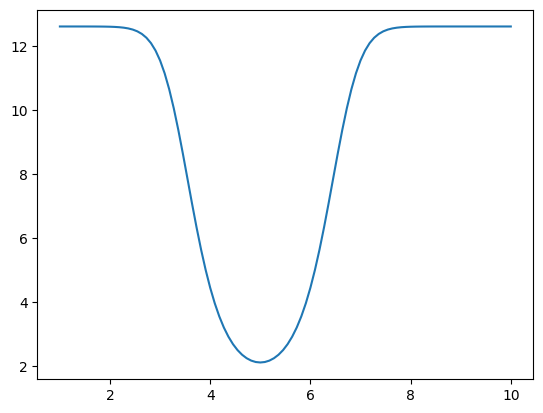

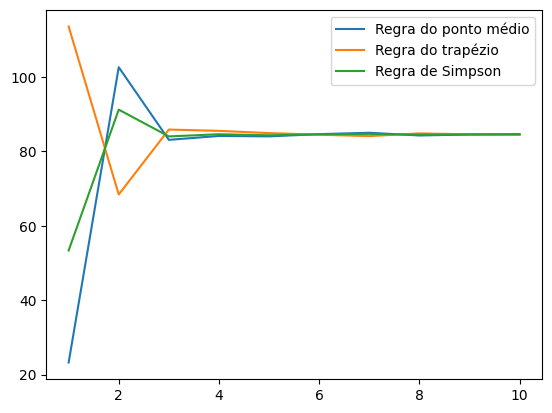

In [ ]:
div = np.linspace(1, 10, 100)
P = CalculaPot(div)
plt.plot(div, P)
plt.show()

a = 1
b = 10

n = np.linspace(1, 10, 10)


_pMedio, _pTrapezio, _pSimpson = integral(a, b, n, CalculaPot)

plt.plot(n, _pMedio)
plt.plot(n, _pTrapezio)
plt.plot(n, _pSimpson)

plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()


### Exercicio 07

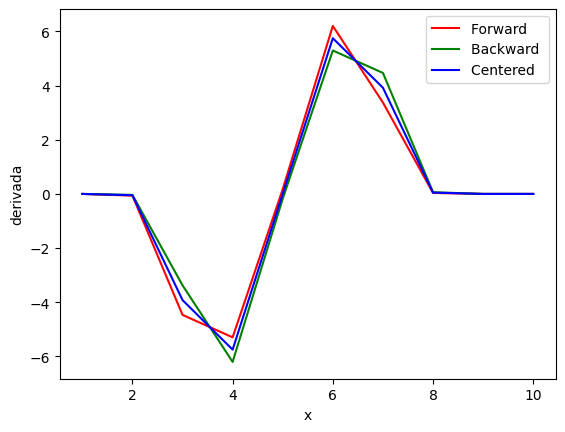

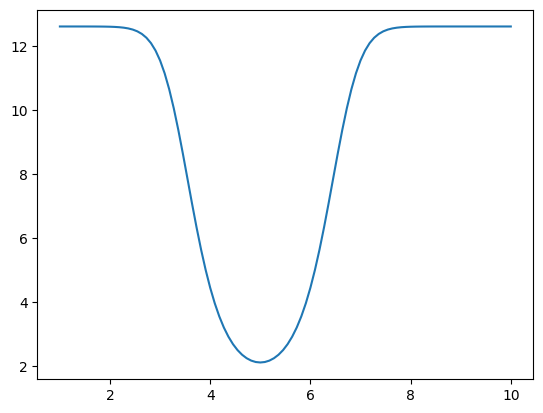

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def C_pot(X):
    n = 8
    m = 9
    QB = 3
    nAtm = n * m - 1
    nB = 0
    
    W = []

    for x in X:
        nv, nc, conec, C, coord = GeraRede(n, m, x)
        P = ResolveRede(conec, C, nAtm, nB, QB, nv, nc)
        W.append(CalculaPotencia(conec, P, C, nv, nc)) 
        
    return np.array(W)

def drvd(x, fun, dist):
    resF = (fun(x + dist) - fun(x)) / dist
    resB = (fun(x) - fun(x - dist)) / dist
    resC = (fun(x + dist) - fun(x - dist)) / (2 * dist)
    return resF, resB, resC

# Generate the x values
x = np.linspace(1, 10, 10)
dist = 1e-1

# Compute the derivatives for each x value
resF = []
resB = []
resC = []

for xi in x:
    f, b, c = drvd(np.array([xi]), C_pot, dist)
    resF.append(f[0])
    resB.append(b[0])
    resC.append(c[0])

resF = np.array(resF)
resB = np.array(resB)
resC = np.array(resC)

# Plot the results
plt.plot(x, resF, "-r", label="Forward ")
plt.plot(x, resB, "-g", label="Backward ")
plt.plot(x, resC, "-b", label="Centered ")
plt.legend()
plt.xlabel("x")
plt.ylabel("derivada")

plt.show()


h = np.linspace(1, 10, 100)
plt.plot(div, C_pot(h))

plt.show()


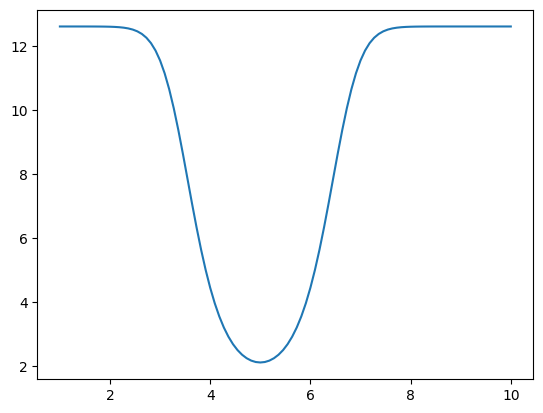

TypeError: 'numpy.float64' object is not iterable

In [ ]:
p=np.linspace( 1, 10 ,100)

plt.plot(div, C_pot(p))
plt.show()

def drvd(x, fun, dist):
    resF = (fun(x + dist) - fun(x)) / dist
    resB = (fun(x) - fun(x - dist)) / dist
    resC = (fun(x + dist) - fun(x - dist)) / (2 * dist)
    return resF, resB, resC

# Generate the x values
x = np.linspace(1, 10, 10)
dist = 1e-1

# Compute the derivatives for each x value
resF = []
resB = []
resC = []

for xi in x:
    f, b, c = drvd(xi, C_pot, dist)
    resF.append(f)
    resB.append(b)
    resC.append(c)

resF = np.array(resF)
resB = np.array(resB)
resC = np.array(resC)

# Plot the results
plt.plot(x, resF, "-r", label="Forward finite difference")
plt.plot(x, resB, "-g", label="Backward finite difference")
plt.plot(x, resC, "-b", label="Centered finite difference")
plt.legend()
plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Finite Difference Derivatives")
plt.show()

### Exercicio 08


In [ ]:
def Cal_Der(x, funcao, dist):
    resF = (funcao(x + dist) - funcao(x))/dist
    resB = (funcao(x) - funcao(x - dist))/dist
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)

    return resF, resB, resC

In [ ]:
X = np.linspace(0, np.pi)
delta = 0.2
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, func , delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.2")
plt.show()

X = np.linspace(0, np.pi)
delta = 0.1
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.1")
plt.show()

X = np.linspace(0, np.pi)
delta = 0.05
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.05")
plt.show()



X = np.linspace(0, np.pi)
delta = 0.025
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.025")
plt.show()




NameError: name 'Func' is not defined